### Libraries

In [120]:
from mobfot import MobFot
client = MobFot()

In [121]:
league = client.get_league("71")

### her takım

In [122]:
import pandas as pd

# Create an empty DataFrame with column names
league_df = pd.DataFrame(columns=["team_name", "team_id"])

# Define the number of rows you want in the DataFrame
num_rows = len(league["table"][0]["data"]["table"]["all"])

In [123]:
import pandas as pd

# Create an empty DataFrame with column names
league_df = pd.DataFrame(columns=["team_name", "team_id"])

# Define the number of rows you want in the DataFrame
num_rows = len(league["table"][0]["data"]["table"]["all"])

# Use a for loop to add rows to the DataFrame
for i in range(num_rows):
    # Create a new row as a dictionary
    new_row = {"team_name": league["table"][0]["data"]["table"]["all"][i]["name"], "team_id": league["table"][0]["data"]["table"]["all"][i]["id"]}
    
    # Append the new row to the DataFrame
    league_df = pd.concat([league_df, pd.DataFrame([new_row])], ignore_index=True)

# Print the resulting DataFrame
print(league_df)

           team_name team_id
0         Fenerbahçe    8695
1        Galatasaray    8637
2    Adana Demirspor    1926
3           Beşiktaş   10188
4          Hatayspor   95749
5           Rizespor    2166
6        Trabzonspor    9752
7          Kasımpaşa    4685
8          Sivasspor    6265
9        Kayserispor   10182
10        Alanyaspor    4678
11        Ankaragücü    9742
12       Antalyaspor    1931
13         Konyaspor    8622
14        Başakşehir    1933
15  Fatih Karagümrük    2088
16         Gaziantep    4081
17        Pendikspor   95745
18      Istanbulspor  106560
19        Samsunspor    9750


### Select Team

In [124]:
team_name = "Adana Demirspor"

In [125]:
if team_name in league_df["team_name"].values:
    team_id = league_df.loc[league_df["team_name"] == team_name, "team_id"].values[0]
else:
    print("Wrong team name!")

In [126]:
team = client.get_team(team_id)

In [127]:
keepers = team["squad"][1][1]
defenders = team["squad"][2][1]
midfielders = team["squad"][3][1]
attackers = team["squad"][4][1]

In [128]:
players = keepers + defenders + midfielders + attackers

### players

In [129]:
# Create an empty DataFrame with column names
player_df = pd.DataFrame(columns=["player_name", "player_id"])

# Define the number of rows you want in the DataFrame
num_rows = len(players)

# Use a for loop to add rows to the DataFrame
for i in range(num_rows):
    # Create a new row as a dictionary
    new_row = {"player_name": players[i]["name"], "player_id": players[i]["id"]}
    
    # Append the new row to the DataFrame
    player_df = pd.concat([player_df, pd.DataFrame([new_row])], ignore_index=True)

# Print the resulting DataFrame
print(player_df)

                 player_name player_id
0                Ertac Özbir    215810
1              Goran Karacic    654234
2   Shahrudin Mahammadaliyev    686090
3              Vedat Karakus    784577
4             Jonas Svensson    171647
5            Kevin Rodrigues    319827
6                Semih Güler    603529
7            Pape Abou Cissé    618345
8           Andrew Gravillon    846609
9          Abdurrahim Dursun    851868
10           Ismail Cokcalis    940357
11            Amir Feratovic   1184668
12          Abdulsamet Burak   1515457
13        Benjamin Stambouli    192920
14              Badou Ndiaye    310764
15               Emre Akbaba    464462
16            Dorukhan Toköz    643168
17            Babajide David    656495
18            Tayfun Aydogan    803596
19            Edouard Michut   1173785
20             Hijran Boyaci   1368303
21               Izzet Celik   1388695
22                      Nani     40945
23              M'Baye Niang     46241
24           Mario Balote

# SELECT

In [130]:
playername = "Younes Belhanda"

In [131]:
if playername in player_df["player_name"].values:
    player_id = player_df.loc[player_df["player_name"] == playername, "player_id"].values[0]
else:
    print("Wrong player name!")

In [132]:
player = client.get_player(player_id)

In [133]:
player_name = player["name"]

### Matches

In [134]:
matches = list(player["recentMatches"].values())[0]
last_one = matches[0]

In [135]:
# Create an empty DataFrame with column names
matches_df = pd.DataFrame(columns=[])

# Define the number of rows you want in the DataFrame
num_rows = len(matches)

# Use a for loop to add rows to the DataFrame
for i in range(num_rows):
    if int(matches[i]["date"]["utcTime"][0:10][5:7]) > 6:
        # Create a new row as a dictionary
        new_row = {"opponent_name": matches[i]["versus"]["opponentName"], 
                   "opponent_id": matches[i]["versus"]["opponentId"], 
                   "match_id": matches[i]["versus"]["matchId"]}
        
        # Append the new row to the DataFrame
        matches_df = pd.concat([matches_df, pd.DataFrame([new_row])], ignore_index=True)

# Print the resulting DataFrame
print(matches_df)

   opponent_name  opponent_id  match_id
0    Trabzonspor         9752   4257176
1     Alanyaspor         4678   4257166
2       Beşiktaş        10188   4257122
3      Kasımpaşa         4685   4257142
4     Pendikspor        95745   4257114
5      Hatayspor        95749   4257128
6           Genk         9987   4287958
7           Genk         9987   4287936
8         Osijek        10157   4268996
9       Rizespor         2166   4257099
10        Osijek        10157   4268964
11      CFR Cluj         9731   4200964
12      CFR Cluj         9731   4200963


#### Opponent Selection

In [136]:
versus = "Beşiktaş"

In [137]:
if versus in matches_df["opponent_name"].values:    
    opponent_name = matches_df.loc[matches_df["opponent_name"] == versus, "opponent_name"].values[0]
    opponent_id = matches_df.loc[matches_df["opponent_name"] == versus, "opponent_id"].values[0]
    match_id = matches_df.loc[matches_df["opponent_name"] == versus, "match_id"].values[0]
else:
    print("Wrong team name!")

In [138]:
match_details = client.get_match_details(match_id)

In [139]:
match_details

{'general': {'matchId': '4257122',
  'matchName': 'Adana Demirspor-vs-Beşiktaş_Wed, Sep 27, 2023, 17:00 UTC',
  'matchRound': '3',
  'teamColors': {'darkMode': {'home': '#6C9CCB', 'away': '#ffffff'},
   'lightMode': {'home': '#6C9CCB', 'away': '#000000'},
   'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
    'away': 'rgba(29, 29, 29, 1.0)'},
   'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
    'away': 'rgba(255, 255, 255, 1.0)'}},
  'leagueId': 71,
  'leagueName': 'Super Lig',
  'leagueRoundName': 'Round 3',
  'parentLeagueId': 71,
  'countryCode': 'TUR',
  'parentLeagueName': 'Super Lig',
  'parentLeagueSeason': '2023/2024',
  'homeTeam': {'name': 'Adana Demirspor', 'id': 1926},
  'awayTeam': {'name': 'Beşiktaş', 'id': 10188},
  'coverageLevel': 'xG',
  'matchTimeUTC': 'Wed, Sep 27, 2023, 17:00 UTC',
  'matchTimeUTCDate': '2023-09-27T17:00:00.000Z',
  'started': True,
  'finished': True},
 'header': {'teams': [{'name': 'Adana Demirspor',
    'id': 1926,
    'score': 4,
 

In [140]:
last_match =  client.get_match_details(matches_df.loc[0]["match_id"])
get_match =  client.get_match_details(match_id)

In [141]:
get_match1 = list(get_match.values())
match_events = list(get_match1[5].values())

In [142]:
match_shots = match_events[4]

### Visualization

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch

#### ShotMap

In [144]:
length = len(match_shots)

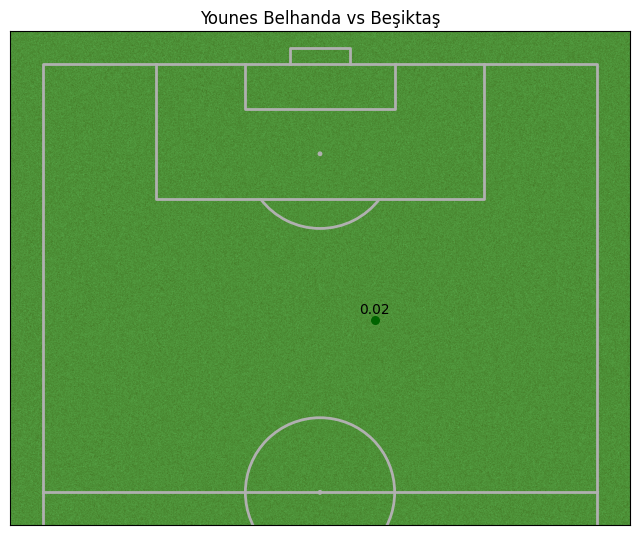

In [145]:
fig = plt.figure(figsize = (8,8), dpi = 100)
ax = plt.subplot(111)

colors = "red"

# Notice the extra parameters passed to the object
pitch = VerticalPitch(
    pitch_type = "uefa",
    half = True,
    axis = True, 
    label = False, 
    tick = False,
    pitch_color='grass',
    goal_type='box'
)

pitch.draw(ax = ax)

# Hypothetical shot.
for i in range(length):
    if match_shots["shots"][i]["playerName"] == playername:
        ax.set_title(playername + " vs " + opponent_name)
    if match_shots["shots"][i]["playerName"] == playername and match_shots["shots"][i]["eventType"] == "Goal":
        colors = "darkgreen"
        ax.scatter(match_shots["shots"][i]["y"],match_shots["shots"][i]["x"], s = 30, c=colors)
        ax.annotate(round(match_shots["shots"][i]["expectedGoals"], 2), (match_shots["shots"][i]["y"],match_shots["shots"][i]["x"]), textcoords="offset points", xytext=(0, 5),  ha='center')
    if match_shots["shots"][i]["playerName"] == playername and match_shots["shots"][i]["eventType"] != "Goal":
        colors = "red"
        ax.scatter(match_shots["shots"][i]["y"],match_shots["shots"][i]["x"], s = 30, c=colors)
        ax.annotate(round(match_shots["shots"][i]["expectedGoals"], 2), (match_shots["shots"][i]["y"],match_shots["shots"][i]["x"]), textcoords="offset points", xytext=(0, 5),  ha='center')